In [1]:
import os
os.getcwd()

'C:\\Users\\pratik\\Desktop\\ML pratik\\ML Revision'

In [2]:
#import standard lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to load csv file using pandas features read_csv
df=pd.read_csv('insurance.csv')
df.head()
#here target is insuranceclaim 
#it is classification algo
#customer will claim or not

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

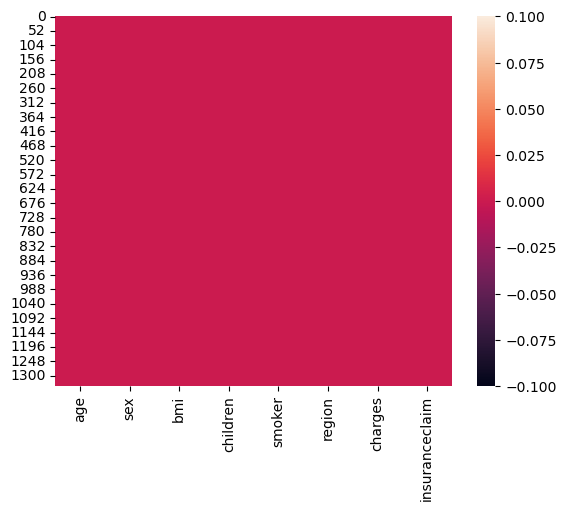

In [5]:
#check null values in visualise form using seaborn lib heatmap fn
sb.heatmap(df.isnull())
plt.show()
#there is no null values

In [6]:
#check how many rows and col
df.shape

(1338, 8)

In [7]:
#check datatypes
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [8]:
#check duplicated values
df.duplicated().sum()

1

In [9]:
#here 1 duplicated values 
#check this values
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [10]:
#to remove duplicated value
df.drop_duplicates(inplace=True)

In [11]:
#check again duplicated values
df.duplicated().sum()

0

In [12]:
#check which feature is important for output manually 
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


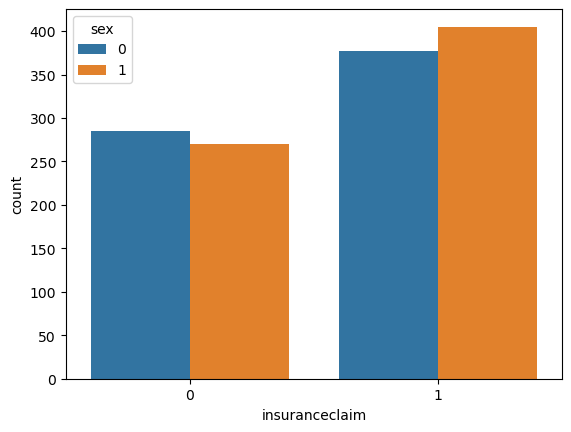

In [13]:
#first check sex(input) relation with insuranceclaim(output)
#so here input is categorial type so for using coutplot
sb.countplot(data=df,x="insuranceclaim",hue="sex")
#in hue always input
plt.show()
#Therefore, the difference in insurance claims between men and women is essentially identical to the insurance not claim.
#so here sex is not important feature to predict output insuranceclaim

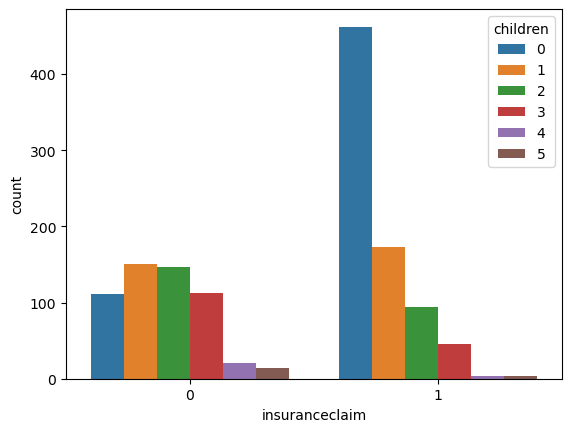

In [14]:
#check children(input) relation with insuranceclaim(output)
sb.countplot(data=df,x="insuranceclaim",hue="children")
plt.show()
#There is a huge difference between insurance claim and  
#insurance not claim for those who have 0 childrens as compared to who have 1,2,3,4 or 5 childrens
#so here children is important feature to predict output

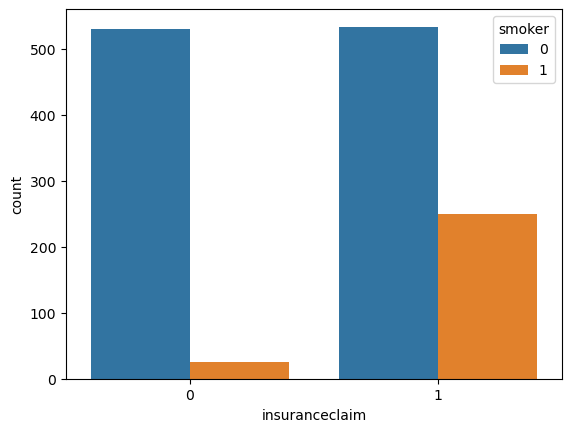

In [15]:
#check smoker(input) relation with insuranceclaim(output)
sb.countplot(data=df,x="insuranceclaim",hue="smoker")
plt.show()
#0 for non smoker
#1 for smoker
#There is a big difference between insurance claim and  
#insurance not claim for those who have smoke
#and non smoke persons have same data in both conditions
##so here smoker is important feature  to predict output

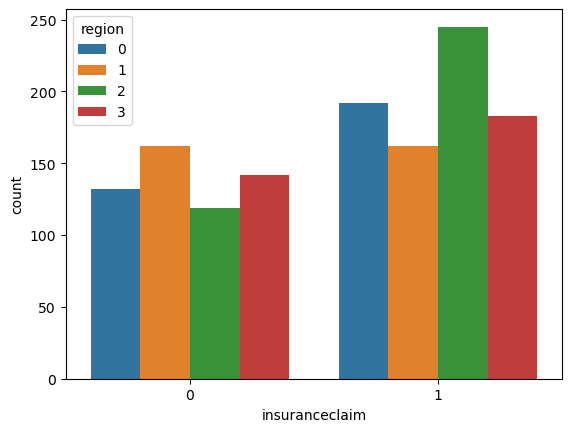

In [16]:
#check region(input) relation with insuranceclaim(output)
sb.countplot(data=df,x="insuranceclaim",hue="region")
plt.show()
#There's a little difference between insuranceclaim claim 
#and insuranceclaim not claim for those who have living in region 2
#so this input little much important to predict output

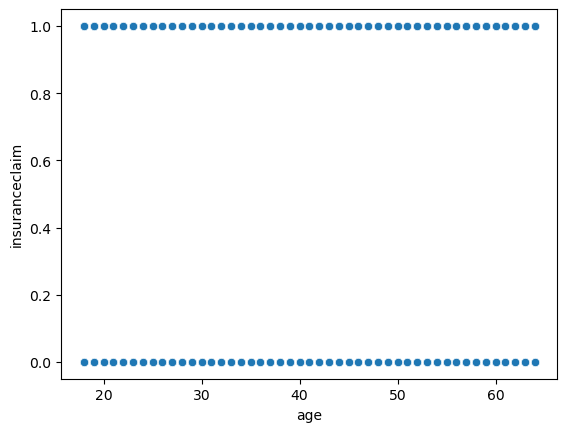

In [17]:
#we are seeing with numerical columns : age,bmi,charges 
#so here input is continuous numeric type so for that using scatterplot
#check age(input) relation with insuranceclaim(output)
#so here input is continuous numeric type and target is categorical type
sb.scatterplot(data=df,x="age",y="insuranceclaim") #here x is input and y is output
plt.show()
#so here each age peoples claim for insurance as well as not claiming for insurance
#0 for not claim
#1 for claim in output y
#so here age is not important feature to predict output

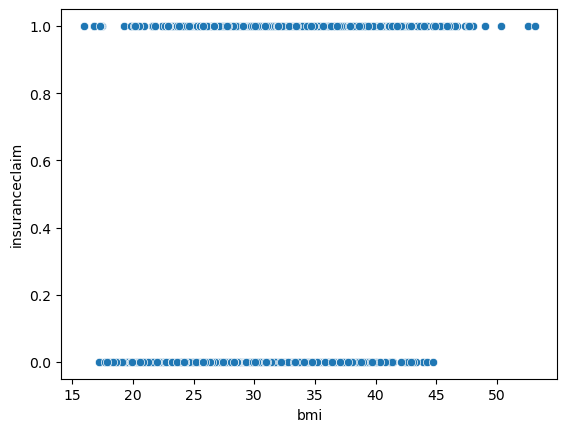

In [18]:
#check bmi(input) relation with insuranceclaim(output)
sb.scatterplot(data=df,x="bmi",y="insuranceclaim")
plt.show()
#so here whose bmi is over 45 those peoples definately claim for insurance 
#so her bmi is important feature for predict output

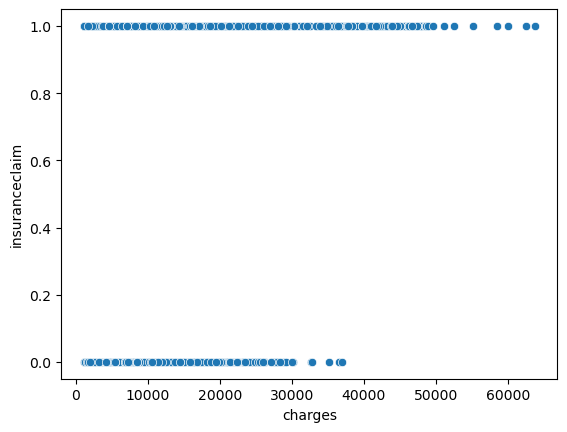

In [19]:
#check charges(input) relation with insuranceclaim(output)
sb.scatterplot(data=df,x="charges",y="insuranceclaim")
plt.show()
#so here charges above 38000 those people definately claim for insurance 
#so charges is important feature to predict output

In [20]:
#we concluded after preprocessing the dataset 
#imp features bmi,charges,smoker,children,region with target means output insuranceclaim
#manually with the help of visualisation

In [21]:
#select input and output
X=df.drop('insuranceclaim',axis=1) #select input
Y=df['insuranceclaim'] #select output

In [22]:
#apply train test split to train the data 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                              random_state=1)

In [23]:
#apply standard scaler on input
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #convert to numpy array
X_test=ss.transform(X_test) #convert to numpy array

In [24]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [25]:
#create fn
def create_model(model):
    
    #train the data with 70%
    model.fit(X_train,Y_train)
    
    #test the data with 30%
    Y_pred=model.predict(X_test)
    
    #to generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    
    return model

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
#to give dataset to LogisticRegression
from sklearn.linear_model import LogisticRegression

In [28]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [29]:
#call fn
lr=create_model(lr)
#recall is 91% which is good and False Negative samples are (recall) is 21
#but logistic Regression not select features important features
#so for that chances of model overfitting situation

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402

[[147  25]
 [ 21 209]]


In [30]:
#give dataset to DT by default gini
from sklearn.tree import DecisionTreeClassifier

In [31]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1)

In [32]:
#call fn
dt=create_model(dt)
#here recall is 96% 
#recall samples are 9

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402

[[168   4]
 [  9 221]]


In [33]:
#check IG
dict={"input":X.columns,"IG":dt.feature_importances_}
#convert to dataframe
df1=pd.DataFrame(dict)
#apply sorting
df1.sort_values("IG",ascending=False,ignore_index=True)
#here IG of children,bmi,smoker is good 
#information gain shows most important features at top

,input,IG
0,children,0.377550
1,bmi,0.330158
2,smoker,0.180860
3,age,0.082568
4,charges,0.028864
5,sex,0.000000
6,region,0.000000


In [34]:
#create object of DecisionTreeClassifier
dt1=DecisionTreeClassifier(random_state=1,max_depth=8)
#call fn
dt1=create_model(dt1)
#at Max_Depth=8 ,recall is 94 which is good
#and recall samples are 13

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       172
           1       0.96      0.94      0.95       230

    accuracy                           0.95       402
   macro avg       0.94      0.95      0.94       402
weighted avg       0.95      0.95      0.95       402

[[163   9]
 [ 13 217]]


In [35]:
#check IG
dict={"input":X.columns,"IG":dt1.feature_importances_}
#convert to dataframe
df2=pd.DataFrame(dict)
#sorting
df2.sort_values("IG",ascending=False,ignore_index=True)
#here children,bmi,smoker,age,region shows IG
#but most imp features at top like children,bmi,smoker
#less imp features at bottom

,input,IG
0,children,0.396539
1,bmi,0.300599
2,smoker,0.194738
3,age,0.081046
4,charges,0.027078
5,sex,0.000000
6,region,0.000000


In [36]:
#crate object of DecisionTreeClassifier
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call fn
dt2=create_model(dt2)
#at min_samples_leaf=45 ,recall is 85 which is good
#and recall samples are 35

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       172
           1       0.91      0.85      0.88       230

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402

[[153  19]
 [ 35 195]]


In [37]:
#give dataset to DT entropy
from sklearn.tree import DecisionTreeClassifier

In [38]:
#create object of DecisionTreeClassifier class
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [39]:
#call fn
dt_entropy=create_model(dt_entropy)
#It gives best recall score 98% 
#and give recall samples are 4

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       1.00      0.98      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402

[[171   1]
 [  4 226]]


In [40]:
#create object of DecisionTreeClassifier class
dt_entropy1=DecisionTreeClassifier(random_state=1,max_depth=7,criterion='entropy')
#call fn
dt_entropy1=create_model(dt_entropy1)
#It gives best recall score 99% 
#and give recall samples 3

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       0.99      0.99      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402

[[170   2]
 [  3 227]]


In [41]:
#check IG
dict={"input":X.columns,"IG":dt_entropy1.feature_importances_}
#convert to DataFrame
df3=pd.DataFrame(dict)
#sorting
df3.sort_values("IG",ascending=False,ignore_index=True)
#here bmi,children,smoker has good IG

,input,IG
0,bmi,0.444781
1,children,0.271510
2,smoker,0.158502
3,age,0.085557
4,charges,0.039650
5,sex,0.000000
6,region,0.000000


In [42]:
#apply second pruning Tech
#min_samples_leaf (entropy)
from sklearn.tree import DecisionTreeClassifier

In [43]:
#crate object of DecisionTreeClassifier
dt2_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=45)
#call fn
dt2_entropy=create_model(dt2_entropy)
#here recall is 86%
#and give recall samples are 33

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       172
           1       0.94      0.86      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

[[160  12]
 [ 33 197]]


In [44]:
#check IG
dict={"input":X.columns,"IG":dt2_entropy.feature_importances_}
#convert to dataframe
df4=pd.DataFrame(dict)
#sorting
df4.sort_values("IG",ascending=False,ignore_index=True)
#here bmi,children,smoker IG is good

,input,IG
0,bmi,0.470769
1,children,0.297326
2,smoker,0.138001
3,age,0.069889
4,charges,0.024015
5,sex,0.000000
6,region,0.000000


In [45]:
#ensemble tech
#give dataset to Randomforest
from sklearn.ensemble import RandomForestClassifier

In [46]:
#create object RandomForestClassifier class by deafault gini 
rfc=RandomForestClassifier(random_state=1,n_estimators=23)
#call fn
rfc=create_model(rfc)
#here recall is 96%

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       172
           1       0.94      0.96      0.95       230

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402

[[159  13]
 [ 10 220]]


In [47]:
#check IG
dict={"input":X.columns,"IG":rfc.feature_importances_}
#convert to dataframe
df5=pd.DataFrame(dict)
#sorting
df5.sort_values("IG",ascending=False,ignore_index=True)
#here bmi,children,charges has more IG

,input,IG
0,bmi,0.355741
1,children,0.243664
2,charges,0.185629
3,age,0.097714
4,smoker,0.080570
5,region,0.024983
6,sex,0.011698


In [48]:
rfc1=RandomForestClassifier(n_estimators=23,random_state=1,max_depth=7) #bydefault gini
#call function 
rfc1=create_model(rfc1)
#here recall is 93%
#and recall samples are 16

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       172
           1       0.96      0.93      0.94       230

    accuracy                           0.94       402
   macro avg       0.93      0.94      0.93       402
weighted avg       0.94      0.94      0.94       402

[[162  10]
 [ 16 214]]


In [49]:
#check information gain :
dict={"input":X.columns,"IG":rfc1.feature_importances_}
#convert dict to dataframe
df6=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df6.sort_values('IG',ascending=False,ignore_index=True)
#so here imp features at top like bmi,children,charges etc

,input,IG
0,bmi,0.361959
1,children,0.266157
2,charges,0.149398
3,smoker,0.116851
4,age,0.081448
5,region,0.016507
6,sex,0.007680


In [50]:
rfc2=RandomForestClassifier(n_estimators=23,random_state=1,min_samples_leaf=55) 

#by default gini index
#call fn
rfc2=create_model(rfc2)
#here recall is 90%

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       172
           1       0.86      0.90      0.88       230

    accuracy                           0.86       402
   macro avg       0.86      0.85      0.86       402
weighted avg       0.86      0.86      0.86       402

[[139  33]
 [ 23 207]]


In [51]:
#check information gain :
dict={"input":X.columns,"IG":rfc2.feature_importances_}
#convert dict to dataframe
df7=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df7.sort_values('IG',ascending=False,ignore_index=True)
#so here imp features are bmi,children,smoker,charges etc

,input,IG
0,bmi,0.354092
1,children,0.254927
2,smoker,0.168592
3,charges,0.149655
4,age,0.060733
5,sex,0.007194
6,region,0.004807


In [52]:
X.shape

(1337, 7)

In [53]:
#give dataset to boosting tech
#1.Adaboost
#here n_estimators means no of decision stump
#ADA boost creates decison stump(means one root node and two leaf node)
#leaf node means no any child
from sklearn.ensemble import AdaBoostClassifier

In [54]:
#create object of AdaBoostclassifier class
ada=AdaBoostClassifier(random_state=1,n_estimators=7)
#call fn
ada=create_model(ada)
#here recall is 90%
#hence all features are imp

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       172
           1       0.85      0.90      0.88       230

    accuracy                           0.85       402
   macro avg       0.85      0.85      0.85       402
weighted avg       0.85      0.85      0.85       402

[[136  36]
 [ 23 207]]


In [55]:
#check IG
#check information gain :
dict={"input":X.columns,"IG":ada.feature_importances_}
#convert dict to dataframe
df8=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df8.sort_values('IG',ascending=False,ignore_index=True)
#so here imp features are bmi,children,age,smoker etc

,input,IG
0,bmi,0.428571
1,children,0.285714
2,age,0.142857
3,smoker,0.142857
4,sex,0.000000
5,region,0.000000
6,charges,0.000000


In [56]:
#apply second boosting tech GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
#n_estimator >=10 and <=100

In [57]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=88)
#call fn
gbc=create_model(gbc)
#here recall is 98%
#ad recall samples are 5

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       172
           1       0.96      0.98      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.96      0.96       402
weighted avg       0.97      0.97      0.97       402

[[163   9]
 [  5 225]]


In [58]:
#check IG
#check information gain :
dict={"input":X.columns,"IG":gbc.feature_importances_}
#convert dict to dataframe
df9=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df9.sort_values('IG',ascending=False,ignore_index=True)
#so imp features are children,bmi,smoker etc

,input,IG
0,children,0.354891
1,bmi,0.324426
2,smoker,0.203479
3,charges,0.072293
4,age,0.044642
5,region,0.000239
6,sex,0.000031


In [59]:
#apply 3rd boosting tech extreme gradient boost
!pip install xgboost

In [60]:
from xgboost import XGBClassifier

In [61]:
 #crate object of XGBClassifier class
xgb=XGBClassifier(random_state=1,n_estimators=17)
#call fb
xgb=create_model(xgb)
#here recall is 99%
#so here recall samples are 3

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       172
           1       0.99      0.99      0.99       230

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402

[[169   3]
 [  3 227]]


In [62]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":xgb.feature_importances_}
#convert dict to dataframe
df10=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df10.sort_values('IG',ascending=False,ignore_index=True)
#so here imp feature are smoker,children,bmi etc

,input,IG
0,smoker,0.385389
1,children,0.273664
2,bmi,0.142210
3,age,0.093992
4,sex,0.047888
5,charges,0.040867
6,region,0.015991


In [63]:
#apply KNN algo
from sklearn.neighbors import KNeighborsClassifier

In [64]:
#create object of KNeighborsClassifier class
#p=2 means Euclidean distance method 
knc=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)

In [65]:
#call fn
knc=create_model(knc)
#here recall is 91%
#and recall samples are 21

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       172
           1       0.90      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

[[149  23]
 [ 21 209]]


In [66]:
#apply support vector machine 
#1.give to linear svc
from sklearn.svm import LinearSVC

In [67]:
#create object of LinearSVC
#svc=LinearSVC(random_state=1,C=0.05)
#C value range between 0 to 1
#After adding error score  changes so my data is linear separatable
svc=LinearSVC(random_state=1)

In [68]:
#call fn
svc=create_model(svc)
#here recall is 92% 
#and recall samples are 19

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.89      0.92      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402

[[146  26]
 [ 19 211]]


In [69]:
#apply KNN algorithm :inbuild class KneighborsClassifier which define in
#outer class neighbors and outer class define in package sklearn
from sklearn.neighbors import KNeighborsClassifier

In [70]:
#create object of KNeighborsClassifier class and passing some parameters
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#standard n_neighbors=5
#p=2 means Euclidean distance method

In [71]:
#call fn
knc=create_model(knc)
#recall is 91%
#and recall samples are 21

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       172
           1       0.90      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

[[149  23]
 [ 21 209]]
